In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
# load dataset
df = pd.read_csv('loan_data_2007_2014.csv')

In [ ]:
# load columns definition file
df_dict = pd.read_excel('LCDataDictionary.xlsx')
df_dict.dropna(inplace=True, subset=['Unnamed: 2'])
df_dict

,Unnamed: 0,Description,Unnamed: 2
0,_rec,The total amount committed by investors for th...,Jumlah total yang dilakukan oleh investor untu...
1,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
3,all_util,Balance to credit limit on all trades,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,The self-reported annual income provided by th...,v
...,...,...,...
73,total_rec_prncp,Principal received to date,Kepala sekolah diterima hingga saat ini
74,total_rev_hi_lim,Total revolving high credit/credit limit,Total Batas Kredit/Kredit Tinggi Revolving
75,url,URL for the LC page with listing data.,URL untuk halaman LC dengan data daftar.
76,verified_status_joint,Indicates if the co-borrowers' joint income wa...,Menunjukkan jika pendapatan bersama co-peminja...


# Data Exploration

In [ ]:
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
298261,298261,28694129,31217335,4800,4800,4800.0,36 months,14.49,165.20,C,...,NaN,NaN,NaN,NaN,NaN,NaN,19200.0,NaN,NaN,NaN
190680,190680,1620149,1892099,8400,8400,8400.0,60 months,16.29,205.57,C,...,NaN,NaN,NaN,NaN,NaN,NaN,41100.0,NaN,NaN,NaN
186096,186096,1914889,2227069,8000,8000,8000.0,36 months,12.12,266.18,B,...,NaN,NaN,NaN,NaN,NaN,NaN,8200.0,NaN,NaN,NaN
283687,283687,30515471,33068634,6000,6000,6000.0,36 months,11.67,198.35,B,...,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,NaN,NaN,NaN
88200,88200,7366725,9028791,35000,35000,35000.0,60 months,23.10,988.68,E,...,NaN,NaN,NaN,NaN,NaN,NaN,30500.0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Dataset Detailed Information

In [ ]:
# detailed data info
detailed = []
for col in df.columns:
    detailed.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), df[col].unique()[:5]])

df_info = pd.DataFrame(data=detailed, columns='Feature, Data Type, Null, Unique, Values'.split(","))
df_info

,Feature,Data Type,Null,Unique,Values
0,Unnamed: 0,int64,0,466285,"[0, 1, 2, 3, 4]"
1,id,int64,0,466285,"[1077501, 1077430, 1077175, 1076863, 1075358]"
2,member_id,int64,0,466285,"[1296599, 1314167, 1313524, 1277178, 1311748]"
3,loan_amnt,int64,0,1352,"[5000, 2500, 2400, 10000, 3000]"
4,funded_amnt,int64,0,1354,"[5000, 2500, 2400, 10000, 3000]"
...,...,...,...,...,...
70,all_util,float64,466285,0,[nan]
71,total_rev_hi_lim,float64,70276,14612,"[nan, 59900.0, 15100.0, 61100.0, 8100.0]"
72,inq_fi,float64,466285,0,[nan]
73,total_cu_tl,float64,466285,0,[nan]


# Feature Extraction *

In [ ]:
df1 = df.copy()

##Feature Selections

In [ ]:
# drop columns with null values
null = []
for x in df1.columns:
  if df[x].nunique() == 0:
    null.append(x)
df1.drop(labels=null, axis=1, inplace=True)

# drop others unsused columns
df1.drop(columns = [
    # unique id
    'Unnamed: 0', 'id', 'member_id',
    # text
     'url', 'desc',
    # only 1 values
    'application_type', 'policy_code',
    # irrelevant / too much variation in values
    'emp_title', 'title', 'zip_code', 'addr_state', 'policy_code', 'sub_grade', 'issue_d'
    ], inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  verification_status          466285 non-null  object 
 11  loan_status                  466285 non-null  object 
 12  pymnt_plan                   466285 non-null  object 
 13 

## Data Type Adjustment

In [ ]:
# datetime data type
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'], format = '%b-%y')
df1['last_credit_pull_d'] = pd.to_datetime(df1['last_credit_pull_d'], format = '%b-%y')
df1['last_pymnt_d'] = pd.to_datetime(df1['last_pymnt_d'], format = '%b-%y')
df1['next_pymnt_d'] = pd.to_datetime(df1['next_pymnt_d'], format = '%b-%y')

In [ ]:
# count the distance until the assumed date
# because this data is old, according to the contents of this dataset, assumed that the data processing date is May 1, 2017
df1['earliest_cr_line'] = abs(round(pd.to_numeric((pd.to_datetime('2017-05-01') - df1['earliest_cr_line']) / np.timedelta64(1, 'M')))) # use .abs() to avoid negative values
df1['last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-05-01') - df1['last_credit_pull_d']) / np.timedelta64(1, 'M')))
df1['last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-05-01') - df1['last_pymnt_d']) / np.timedelta64(1, 'M')))
df1['next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-05-01') - df1['next_pymnt_d']) / np.timedelta64(1, 'M')))

In [ ]:
# values in colums 'term' change to numeric
df1['term'] = df1['term'].apply(lambda x: int(x[:3]))

df1['term'].unique()

array([36, 60])

In [ ]:
# values in colums 'emp_length' change to numeric
df1['emp_length'] = df1['emp_length'].str.replace('\+ years', '')
df1['emp_length'] = df1['emp_length'].str.replace('< 1 year', str(0))
df1['emp_length'] = df1['emp_length'].str.replace(' years', '')
df1['emp_length'] = df1['emp_length'].str.replace(' year', '')

df1['emp_length'] = pd.to_numeric(df1['emp_length'])
df1['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

# Exploratory Data Analysis *

In [ ]:
df2 = df1.copy()

## Highly Correlation

How to drop out highly correlated features? [Check](https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python)

In [ ]:
# calculate correlation matrix
corr_matrix = df2.corr().abs()

# get upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# drop highly correlated features
df2.drop(to_drop, axis=1, inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  int64  
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_length                  445277 non-null  float64
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466281 non-null  float64
 7   verification_status         466285 non-null  object 
 8   loan_status                 466285 non-null  object 
 9   pymnt_plan                  466285 non-null  object 
 10  purpose                     466285 non-null  object 
 11  dti                         466285 non-null  float64
 12  delinq_2yrs                 466256 non-null  float64
 13  earliest_cr_li

## Define the Target

In [ ]:
# column 'loan_status' as target
df2['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

> Customer with 'loan_status' : 'Current',
                                'Fully Paid',
                                'Late (31-120 days)', and
                                'In Grace Period' considered as a good borrower.

> People who apply for credit under these conditions will be accepted/approved.


In [ ]:
approved = [
    'Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period'
]

df2['status'] = np.where(df2['loan_status'].isin(approved), 1, 0)

In [ ]:
df2['status'].value_counts()

1    419011
0     47274
Name: status, dtype: int64

> 419.011 data - good status (good borower) and 47.274 data - bad status (bad borrower)

> Note : imbalance dataset, this situation is not good for the result in machine learning models, will be reviewed at a later stage.

In [ ]:
# drop 'loan_status' column
df2.drop(columns=['loan_status'], axis=1, inplace=True)

## Descriptive Statistics

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  int64  
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_length                  445277 non-null  float64
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466281 non-null  float64
 7   verification_status         466285 non-null  object 
 8   pymnt_plan                  466285 non-null  object 
 9   purpose                     466285 non-null  object 
 10  dti                         466285 non-null  float64
 11  delinq_2yrs                 466256 non-null  float64
 12  earliest_cr_line            466256 non-null  float64
 13  inq_last_6mths

In [ ]:
# categorize type of columns - categorical or numerics
cats = df2.select_dtypes(include='object')
nums = df2.drop(columns=cats.columns)

In [ ]:
cats.describe().T

,count,unique,top,freq
grade,466285,7,B,136929
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
pymnt_plan,466285,2,n,466276
purpose,466285,14,debt_consolidation,274195
initial_list_status,466285,2,f,303005


> Values of each categorical feature is good, no need for further handling.

In [ ]:
nums.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
term,466285.0,42.605334,10.719040,36.00,36.00,36.00,60.00,60.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
emp_length,445277.0,5.993330,3.627044,0.00,3.00,6.00,10.00,10.00
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.00,63000.00,88960.00,7500000.00
dti,466285.0,17.218758,7.851121,0.00,11.36,16.87,22.78,39.99
delinq_2yrs,466256.0,0.284678,0.797365,0.00,0.00,0.00,0.00,29.00
earliest_cr_line,466256.0,235.379959,86.461673,66.00,177.00,219.00,278.00,619.00
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.00,0.00,1.00,33.00
mths_since_last_delinq,215934.0,34.104430,21.778487,0.00,16.00,31.00,49.00,188.00


> Values of each numerical feature is good, no need for further handling.

# Bussiness Analysis

In [ ]:
df1_analysis = df1.copy() # without column 'status'
df2_analysis = df2.copy()

In [ ]:
# detailed data info
detail = []
for col in df1_analysis.columns:
    detail.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), df[col].unique()[:5]])

df_ba = pd.DataFrame(data=detailed, columns='Feature, Data Type, Null, Unique, Values'.split(","))
df_ba

,Feature,Data Type,Null,Unique,Values
0,Unnamed: 0,int64,0,466285,"[0, 1, 2, 3, 4]"
1,id,int64,0,466285,"[1077501, 1077430, 1077175, 1076863, 1075358]"
2,member_id,int64,0,466285,"[1296599, 1314167, 1313524, 1277178, 1311748]"
3,loan_amnt,int64,0,1352,"[5000, 2500, 2400, 10000, 3000]"
4,funded_amnt,int64,0,1354,"[5000, 2500, 2400, 10000, 3000]"
...,...,...,...,...,...
70,all_util,float64,466285,0,[nan]
71,total_rev_hi_lim,float64,70276,14612,"[nan, 59900.0, 15100.0, 61100.0, 8100.0]"
72,inq_fi,float64,466285,0,[nan]
73,total_cu_tl,float64,466285,0,[nan]


### Number of Applicants by Loan Status

In [ ]:
# table total number of application by loan status
loan_group = df1_analysis.groupby('loan_status').size().reset_index()
loan_group.columns = ['Loan Status','Total Application']
loan_group.sort_values(by='Total Application', ascending=False).style.background_gradient(cmap='Reds')

,Loan Status,Total Application
1,Current,224226
5,Fully Paid,184739
0,Charged Off,42475
8,Late (31-120 days),6900
6,In Grace Period,3146
4,Does not meet the credit policy. Status:Fully Paid,1988
7,Late (16-30 days),1218
2,Default,832
3,Does not meet the credit policy. Status:Charged Off,761


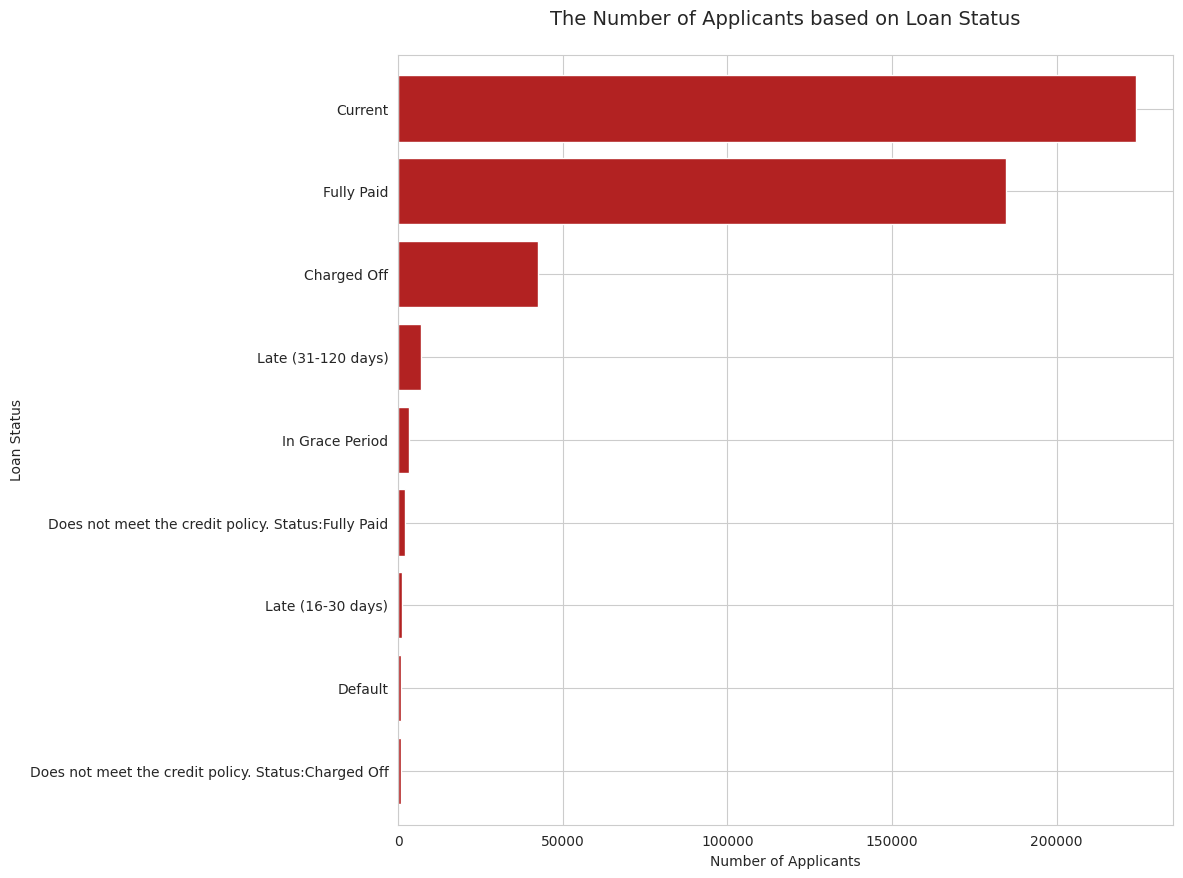

In [ ]:
# visualization
sns.set_style('whitegrid')
plt.figure(figsize = (10,10))

num_apply = df1_analysis['loan_status'].value_counts().sort_values(ascending=True)
num_apply.plot(kind='barh', color='firebrick', width=0.8)

plt.title('The Number of Applicants based on Loan Status\n', fontsize=14)
plt.ylabel('Loan Status')
plt.xlabel('Number of Applicants')
plt.show()

> The company's performance has been quite good, where most of the borrowers have fully paid status and are ongoing (current). But the number of borrowers who experienced obstacles in the lending process was also quite a lot.



### Loan Status by Term

Text(0, 0.5, 'Number of Debtor')

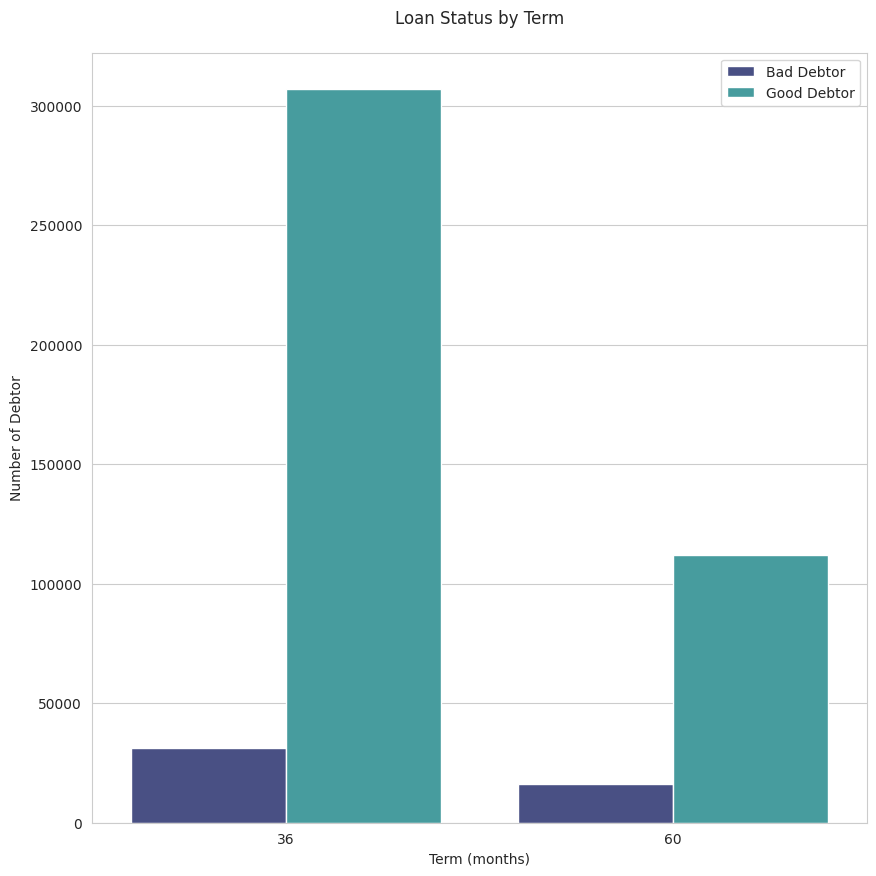

In [ ]:
# visualization
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')

sns.countplot(data = df2_analysis, x='term', hue = 'status', palette='mako')

plt.legend(['Bad Debtor', 'Good Debtor'])

plt.title('Loan Status by Term\n', fontsize=12)
plt.xlabel('Term (months)', fontsize=10)
plt.ylabel('Number of Debtor', fontsize=10)

> There are only two types of loan terms: 36 months and 60 months.

> More people take shorter terms, but also the number of debtors who are categorized as bad is also greater in this term.


### Loan Status by Home Ownership

In [ ]:
df2_analysis['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
# reduce the number of categories of home ownership
def own_home(value):
    if value['home_ownership'] == 'MORTGAGE':
        new_value = 'MORTGAGE'
    elif (value['home_ownership'] == 'RENT'):
        new_value ='RENT'
    elif (value['home_ownership'] == 'OWN'):
        new_value ='OWN'
    else:
        new_value ='OTHERS'
    return new_value

df2_analysis['home_ownership'] = df2_analysis.apply(own_home, axis=1)

Text(0, 0.5, 'Number of Applicants\n')

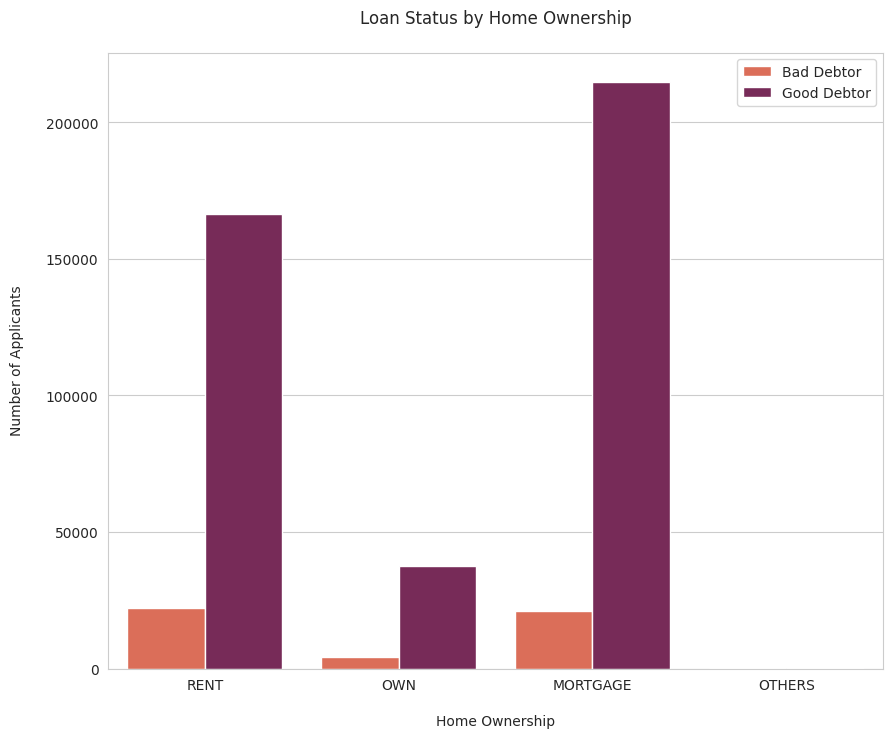

In [ ]:
# visualization
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')

sns.countplot(data = df2_analysis, x='home_ownership', hue = 'status', palette='rocket_r')
plt.title('Loan Status by Home Ownership\n', fontsize=12)

plt.legend(['Bad Debtor', 'Good Debtor'])

plt.xlabel('\nHome Ownership', fontsize=10)
plt.ylabel('Number of Applicants\n', fontsize=10)

> Most applicants have an existing mortgage or are currently renting a home.

> Applicants who have an existing mortgage or are currently renting a home have a higher probability of bad loan.

### Loan Status by Purpose

In [ ]:
df2_analysis['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

In [ ]:
# reduce the number of categories of purpose
df2_analysis['purpose'] = np.select([(df2_analysis['purpose'] == 'debt_consolidation'),
                               (df2_analysis['purpose'] == 'credit_card'),
                               (df2_analysis['purpose'] == 'other'),
                               (df2_analysis['purpose'] == 'major_purchase'),
                               (df2_analysis['purpose'].str.contains('home|car|house')),
                               (df2_analysis['purpose'].str.contains('small|medic|moving|vaca|wedd|educa|renew'))],
                               ['Debt Consolidation','Credit Card','Other','Major Purchase','Object Spending','Life Spending'])

In [ ]:
# table bad debtur by purpose
df_bad = df2_analysis[(df2_analysis['status'] == 0)]
df_bad = df_bad.groupby(['purpose'])['loan_amnt'].agg(['count']).reset_index()
df_bad.columns = ['Reason', 'Bad Debtur']
df_bad['Percentage [%]'] = round((df_bad['Bad Debtur']/len(df2_analysis))*100,3)
df_bad = df_bad.sort_values('Bad Debtur', ascending=False).reset_index(drop=True)
df_bad.style.background_gradient(cmap='Greens')

,Reason,Bad Debtur,Percentage [%]
0,Debt Consolidation,28246,6.058000
1,Credit Card,8100,1.737000
2,Life Spending,3396,0.728000
3,Other,3310,0.710000
4,Object Spending,3259,0.699000
5,Major Purchase,963,0.207000


Text(0.5, 0, '\nPurpose')

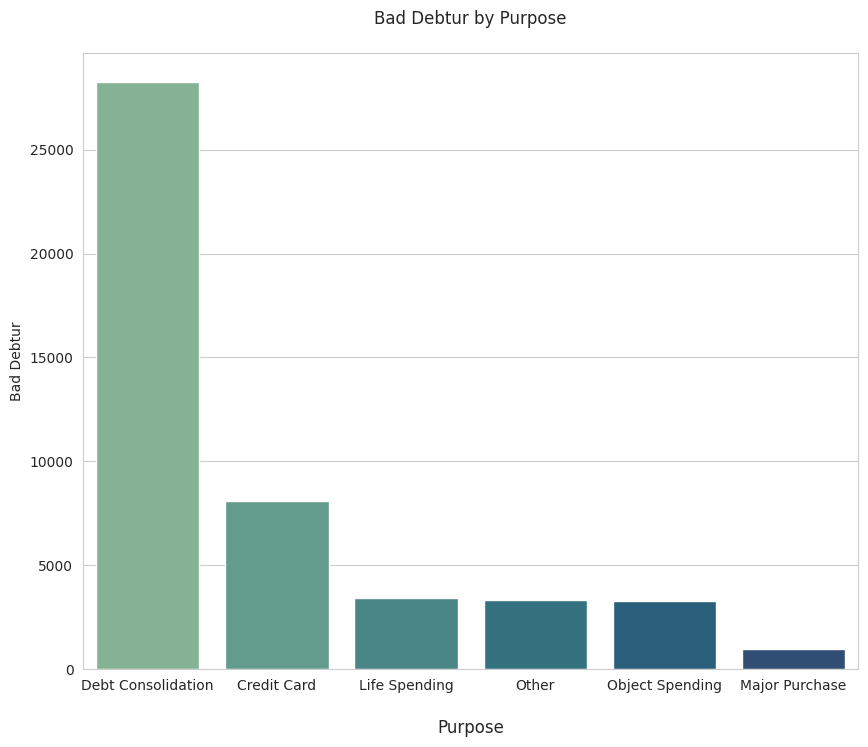

In [ ]:
# visualization
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')

sns.barplot(data = df_bad, x='Reason', y='Bad Debtur', palette='crest')
plt.title('Bad Debtur by Purpose\n', fontsize=12)
plt.xlabel('\nPurpose', fontsize=12)

> People who are categorized as bad borrowers mostly borrow with a purpose 'Debt Consolidation'. In the second position - 'Credit Card'.

> In the future, it is better to reject application that have 'Debt Consolidation' and 'Credit Card' purposes.

### Loan Status by Grade

In [ ]:
# aggregate table
df_grade = df2_analysis.groupby(['grade', 'status'])['grade'].agg(['count']).reset_index()
df_grade['status'] = np.where(df_grade['status'] == 0, 'Bad', 'Good')

df_grade2 = df2_analysis.groupby(['grade'])['status'].agg(['count']).reset_index()

sum = []
for r in df_grade2['count']:
  sum.append(r)
  sum.append(r)

df_grade['sum'] = sum

df_grade['percent'] = round(df_grade['count']/df_grade['sum']*100, 2)
df_grade = df_grade[['grade', 'status', 'count', 'percent']]
df_grade.columns = ['Grade','Status', 'Number of Applicant', 'Percentage of each Grade']
# df_grade = df_grade.sort_values('Grade', ascending=False).reset_index(drop=True)
df_grade.style.background_gradient(axis=0, gmap=df_grade['Percentage of each Grade'], cmap='YlOrRd')
# df_grade.style.background_gradient(cmap='Reds')

,Grade,Status,Number of Applicant,Percentage of each Grade
0,A,Bad,2713,3.620000
1,A,Good,72154,96.380000
2,B,Bad,9909,7.240000
3,B,Good,127020,92.760000
4,C,Bad,13167,10.510000
5,C,Good,112126,89.490000
6,D,Bad,10935,14.220000
7,D,Good,65953,85.780000
8,E,Bad,6551,18.320000
9,E,Good,29206,81.680000


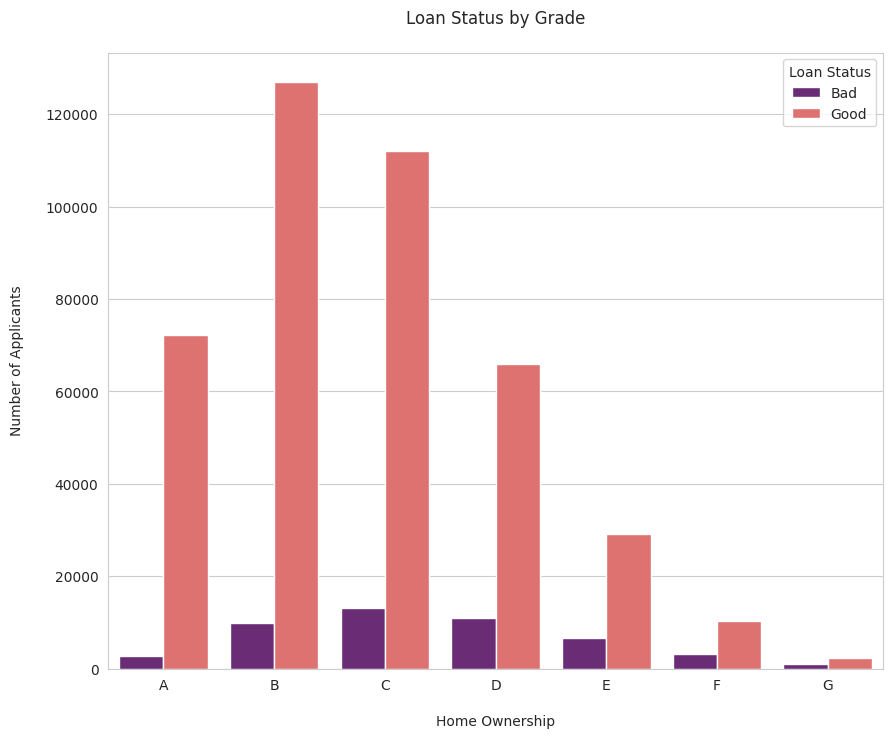

In [ ]:
# visualization - 1
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')

sns.barplot(data = df_grade, x='Grade', y='Number of Applicant', hue = 'Status', palette='magma')
plt.title('Loan Status by Grade\n', fontsize=12)

plt.legend(title='Loan Status')

plt.xlabel('\nHome Ownership', fontsize=10)
plt.ylabel('Number of Applicants\n', fontsize=10)
plt.show()

> The highest number of borrowers are those with grade B, but for the number of borrowers who are categorized as bad, more have grade C.

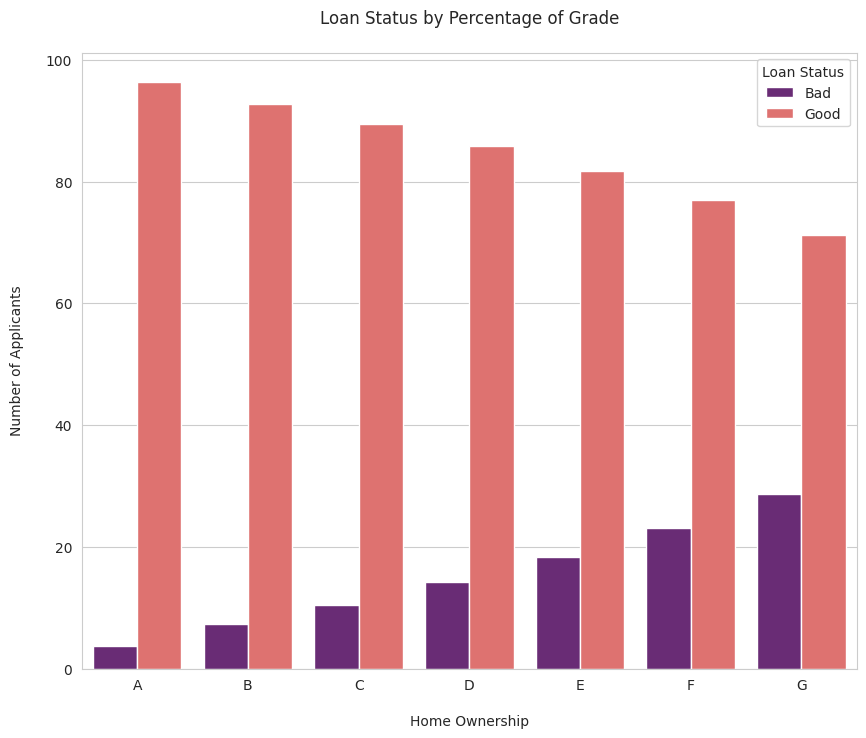

In [ ]:
# visualization - 2
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')

sns.barplot(data = df_grade, x='Grade', y='Percentage of each Grade', hue = 'Status', palette='magma')
plt.title('Loan Status by Percentage of Grade\n', fontsize=12)

plt.legend(title='Loan Status')

plt.xlabel('\nHome Ownership', fontsize=10)
plt.ylabel('Number of Applicants\n', fontsize=10)
plt.show()

> The percentage of each group is the percentage of the number of applicants in a particular status compared to the total number of applicants for each grade.

> From Grade A to G, the percentage of borrowers who are categorized as good gets smaller, while the percentage of borrowers who are categorized as bad gets bigger.

# Data Preprocessing

## Handling Duplicated Data

In [ ]:
# data duplicated check
print('Jumlah data duplikat :', df.duplicated().sum())

Jumlah data duplikat : 0


## Handling Missing Values *

In [ ]:
df3 = df2.copy()

### Numerical Features

In [ ]:
df3.isnull().sum()

loan_amnt                          0
term                               0
int_rate                           0
grade                              0
emp_length                     21008
home_ownership                     0
annual_inc                         4
verification_status                0
pymnt_plan                         0
purpose                            0
dti                                0
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    29
mths_since_last_delinq        250351
mths_since_last_record        403647
open_acc                          29
pub_rec                           29
revol_bal                          0
revol_util                       340
total_acc                         29
initial_list_status                0
out_prncp                          0
total_rec_late_fee                 0
recoveries                         0
last_pymnt_d                     376
collections_12_mths_ex_med       145
a

In [ ]:
# drop columns with a lot of missing values
df3.drop(columns = ['mths_since_last_delinq', 'mths_since_last_record'], inplace=True)

In [ ]:
# Feature `tot_coll_amt`,`tot_cur_bal` replace missing value with "0"
for col in ['tot_coll_amt','tot_cur_bal']:
    df3[col] = df3[col].fillna(0)

# Numerical columns replace missing value with "Median"
for col in df3.select_dtypes(exclude = 'object'):
    df3[col] = df3[col].fillna(df3[col].median())

df3.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_rec_late_fee            0
recoveries                    0
last_pymnt_d                  0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
status                        0
dtype: int64

### Categorical Features

In [ ]:
# Categorical columns replace missing value with "Mode"
for col in df3.select_dtypes(include = 'object'):
    df3[col] = df3[col].fillna(df3[col].mode().iloc[0])

df3.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_rec_late_fee            0
recoveries                    0
last_pymnt_d                  0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
status                        0
dtype: int64

## Feature Selection using WoE and IV **


> In making a decision to eliminate data at this stage will also use Weight of Evidence (WoE) and Information Value (IV) to:
1. recognition of variables with the greatest impact on target variable
2. understanding relations between important predictors and target-variable.

> Information value table : [Link](https://miro.medium.com/v2/resize:fit:640/format:webp/1*5S_5aAHWe0_knDGZUK3W8w.png)

[Source 1](https://datasciencestunt.com/weight-of-evidence-woe-and-information-value-iv/);
[Source 2](https://sundarstyles89.medium.com/weight-of-evidence-and-information-value-using-python-6f05072e83eb);
[Source 3](https://towardsdatascience.com/attribute-relevance-analysis-in-python-iv-and-woe-b5651443fc04)

In [ ]:
# copy dataset for this step
df4 = df3.copy()

In [ ]:
# copy dataset to save
df5 = df3.copy()

In [ ]:
# categorize type of columns - categorical or numerics
cats_new = df4.select_dtypes(include='object')
nums_new = df4.drop(columns=cats.columns)
nums_new = nums_new.drop(labels='status', axis=1)

In [ ]:
# WoE and IV function
def woe_iv(feature,target = 'status'):
  df_woe_iv = (pd.crosstab(df4[feature], df4[target],
                      normalize='columns')
             .assign(woe=lambda x: np.log(x[1] / x[0]))
             .assign(iv=lambda x: np.sum(x['woe']*
                                           (x[1]-x[0]))))
  return df_woe_iv

### Numerical Features

For numerical features, though there’s a natural ordering for various numerical values, sometimes nonlinearity exists. In such cases, a linear model fails to capture that nonlinearity.

For example, the average income for a bunch of individuals could increase by time within the age range 20-60. But, might drop after the age of 60 (because of retirement after that).

In such cases, WOE provides scores for each truncated phase (e.g. 30-40, 40-50, …, 60-70) which can process the nonlinearity of the data.

In [ ]:
#'loan_amnt' - refining class
df4['loan_amnt'] = pd.cut(df4['loan_amnt'], 10)

# 'int_rate' - refining class
df4['int_rate'] = pd.cut(df4['int_rate'], 10)

# 'annual_inc' - refining class
df4['annual_inc'] = pd.cut(df4['annual_inc'], 1)

# 'dti' - refining class
df4['dti'] = pd.cut(df4['dti'], 10)

# 'delinq_2yrs' - this feature will be encoded, if values = 0 return 0, if its greater than 0 return 1, if > 5, return 2
df4['delinq_2yrs'] = np.where(df4['delinq_2yrs'] > 3, 3,
                                 np.where(df4['delinq_2yrs'] == 2, 2,
                                 np.where(df4['delinq_2yrs'] == 1,1,0)))

# 'earliest_cr_line' - refining class
df4['earliest_cr_line'] = pd.cut(df4['earliest_cr_line'], 10)

# 'inq_last_6mths' - encoding the feature
df4['inq_last_6mths'] = np.where(df4['inq_last_6mths'] == 0,0,
                                    np.where((df4['inq_last_6mths'] > 0)&(df4['inq_last_6mths'] <=3),1,
                                    np.where((df4['inq_last_6mths']>3)&(df4['inq_last_6mths']<=6),2, 3)))

# 'open_acc' - refining class
df4['open_acc'] = pd.cut(df4['open_acc'], 4)

# 'pub_rec' - refining class
df4['pub_rec'] = pd.cut(df4['pub_rec'], 1)

# 'revol_bal' - encode to new class
df4['revol_bal'] = np.where((df4['revol_bal']>=0)&(df4['revol_bal']<=5000),0,
                               np.where((df4['revol_bal']>5000)&(df4['revol_bal']<=10000),1,
                               np.where((df4['revol_bal']>10000)&(df4['revol_bal']<=15000),2,3)))

# 'revol_util' - encoding into new class
df4['revol_util'] = np.where((df4['revol_util']>=0)&(df4['revol_util']<=20),0,
                                np.where((df4['revol_util']>20)&(df4['revol_util']<=40),1,
                                np.where((df4['revol_util']>40)&(df4['revol_util']<=60),2,
                                np.where((df4['revol_util']>60)&(df4['revol_util']<=80),3,4))))

# 'total_acc' - refining class
df4['total_acc'] = pd.cut(df4['total_acc'], 2)

# 'out_prncp' - encoding into new class
df4['out_prncp'] = np.where((df4['out_prncp']>=0)&(df4['out_prncp']<=1000),0,
                               np.where((df4['out_prncp']>1000)&(df4['out_prncp']<=10000),1,
                               np.where((df4['out_prncp']>10000)&(df4['out_prncp']<=17000),2,3)))

# 'total_rec_late_fee' - encoding into new class
df4['total_rec_late_fee'] = np.where(df4['total_rec_late_fee']==0,0,1)

# 'recoveries' - refining class
df4['recoveries'] = pd.cut(df4['recoveries'], 1)

# 'last_pymnt_d' - encoding into new class
df4['last_pymnt_d'] = np.where(df4['last_pymnt_d']==2,0,
                                  np.where((df4['last_pymnt_d']>2)&(df4['last_pymnt_d']<=4),1,
                                  np.where((df4['last_pymnt_d']>4)&(df4['last_pymnt_d']<=6),2,
                                  np.where((df4['last_pymnt_d']>6)&(df4['last_pymnt_d']<=12),3,4))))

# 'collections_12_mths_ex_med' - refining class
df4['collections_12_mths_ex_med'] = pd.cut(df4['collections_12_mths_ex_med'], 1)

# 'acc_now_delinq' - refining class
df4['acc_now_delinq'] = pd.cut(df4['acc_now_delinq'], 4)

# 'tot_coll_amt' - refining class
df4['tot_coll_amt'] = pd.cut(df4['tot_coll_amt'], 1)

# 'tot_cur_bal' - refining class
df4['tot_cur_bal'] = pd.cut(df4['tot_cur_bal'], 1)

In [ ]:
col_nums = []
row_nums = []
for i in nums_new:
  nums_iv = round(woe_iv(i).iloc[0,3], 5)
  col_nums.append(i)
  row_nums.append(nums_iv)

iv_nums = pd.DataFrame({'feature' :col_nums,
                   'iv' : row_nums})
iv_nums

,feature,iv
0,loan_amnt,0.00214
1,term,0.02542
2,int_rate,0.30742
3,emp_length,0.00987
4,annual_inc,0.00000
5,dti,0.01762
6,delinq_2yrs,0.00036
7,earliest_cr_line,0.01158
8,inq_last_6mths,0.11302
9,open_acc,0.00035


In [ ]:
iv_nums['result'] = np.where(iv_nums['iv']> 0.5,0,(np.where(iv_nums['iv'] < 0.02,0,1)))

iv_nums_to_drop = iv_nums[~(iv_nums['result'] == 1)].reset_index()

nums_drop = []
for m in iv_nums_to_drop['feature']: nums_drop.append(m)

nums_drop

['loan_amnt',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'recoveries',
 'last_pymnt_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal']

In [ ]:
# drop numerical columns - not useful for modeling or suspicious relationship with the target
df5.drop(nums_drop, axis=1, inplace=True)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   term                 466285 non-null  int64  
 1   int_rate             466285 non-null  float64
 2   grade                466285 non-null  object 
 3   home_ownership       466285 non-null  object 
 4   verification_status  466285 non-null  object 
 5   pymnt_plan           466285 non-null  object 
 6   purpose              466285 non-null  object 
 7   inq_last_6mths       466285 non-null  float64
 8   revol_util           466285 non-null  float64
 9   initial_list_status  466285 non-null  object 
 10  total_rec_late_fee   466285 non-null  float64
 11  status               466285 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 42.7+ MB


### Categorical Features

In [ ]:
# there is an infinity value on 'home_ownership', move value "ANY" to "OTHER"
df4['home_ownership'] = np.where(df4['home_ownership']=='ANY','OTHER', df4['home_ownership'])

In [ ]:
col_cats = []
row_cats = []
for j in cats:
  cats_iv = round(woe_iv(j).iloc[0,3], 6)
  col_cats.append(j)
  row_cats.append(cats_iv)

iv_cats = pd.DataFrame({'feature' :col_cats,
                   'iv' : row_cats})
iv_cats

,feature,iv
0,grade,0.294478
1,home_ownership,0.022967
2,verification_status,0.017465
3,pymnt_plan,0.000000
4,purpose,0.051528
5,initial_list_status,0.052730


In [ ]:
iv_cats['result'] = np.where(iv_cats['iv']> 0.5,0,(np.where(iv_cats['iv'] < 0.02,0,1)))

iv_cats_to_drop = iv_cats[~(iv_cats['result'] == 1)].reset_index()

cats_drop = []
for n in iv_cats_to_drop['feature']: cats_drop.append(n)

cats_drop

['verification_status', 'pymnt_plan']

In [ ]:
# drop categorical columns - not useful for modeling or suspicious relationship with the target
df5.drop(cats_drop, axis=1, inplace=True)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   term                 466285 non-null  int64  
 1   int_rate             466285 non-null  float64
 2   grade                466285 non-null  object 
 3   home_ownership       466285 non-null  object 
 4   purpose              466285 non-null  object 
 5   inq_last_6mths       466285 non-null  float64
 6   revol_util           466285 non-null  float64
 7   initial_list_status  466285 non-null  object 
 8   total_rec_late_fee   466285 non-null  float64
 9   status               466285 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 35.6+ MB


## Outliers Handling

In [ ]:
from scipy import stats

In [ ]:
cat = df5.select_dtypes(include='O').columns
num = df5.select_dtypes(exclude='O').columns

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df5)}')

filtered_entries = np.array([True] * len(df5))

for col in num:
  zscore = abs(stats.zscore(df5[col])) # absolute z-score
  filtered_entries = (zscore < 3) & filtered_entries # keep absolute z-score < 3

df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df5)}')

Jumlah baris sebelum memfilter outlier: 466285
Jumlah baris setelah memfilter outlier: 466285


In [ ]:
cat

Index(['grade', 'home_ownership', 'purpose', 'initial_list_status'], dtype='object')

## Feature Transformation *

In [ ]:
df6 = df5.copy()

In [ ]:
df6.describe()

,term,int_rate,inq_last_6mths,revol_util,total_rec_late_fee,status
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000
mean,42.605334,13.829236,0.804695,56.177985,0.650129,0.898616
std,10.719040,4.357587,1.091583,23.724005,5.265730,0.301837
min,36.000000,5.420000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.990000,0.000000,39.200000,0.000000,1.000000
50%,36.000000,13.660000,0.000000,57.600000,0.000000,1.000000
75%,60.000000,16.490000,1.000000,74.700000,0.000000,1.000000
max,60.000000,26.060000,33.000000,892.300000,358.680000,1.000000


In [ ]:
num

Index(['term', 'int_rate', 'inq_last_6mths', 'revol_util',
       'total_rec_late_fee', 'status'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = ['term', 'int_rate', 'inq_last_6mths', 'revol_util',
       'total_rec_late_fee']

for r in std:
  df6[r] = StandardScaler().fit_transform(df6[r].values.reshape(len(df6), 1))

In [ ]:
df6.describe()

,term,int_rate,inq_last_6mths,revol_util,total_rec_late_fee,status
count,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,466285.000000
mean,-1.269052e-16,-1.142756e-15,-9.882089e-17,-6.918224e-17,-6.552503e-18,0.898616
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.301837
min,-6.162250e-01,-1.929794e+00,-7.371823e-01,-2.367983e+00,-1.234643e-01,0.000000
25%,-6.162250e-01,-6.515623e-01,-7.371823e-01,-7.156466e-01,-1.234643e-01,1.000000
50%,-6.162250e-01,-3.883712e-02,-7.371823e-01,5.993998e-02,-1.234643e-01,1.000000
75%,1.622784e+00,6.106056e-01,1.789197e-01,7.807297e-01,-1.234643e-01,1.000000
max,1.622784e+00,2.806778e+00,2.949419e+01,3.524375e+01,6.799252e+01,1.000000


## Feature Encoding *

In [ ]:
df7 = df6.copy()

In [ ]:
for q in cat:
  print(df7[q].value_counts())

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64
debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64
f    303005
w    163280
Name: initial_list_status, dtype: int64


### Label Encoding

No features are processed at this stage.

### OneHot Encoding

In [ ]:
df7 = pd.get_dummies(df7, columns=cat)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        466285 non-null  float64
 1   int_rate                    466285 non-null  float64
 2   inq_last_6mths              466285 non-null  float64
 3   revol_util                  466285 non-null  float64
 4   total_rec_late_fee          466285 non-null  float64
 5   status                      466285 non-null  int64  
 6   grade_A                     466285 non-null  uint8  
 7   grade_B                     466285 non-null  uint8  
 8   grade_C                     466285 non-null  uint8  
 9   grade_D                     466285 non-null  uint8  
 10  grade_E                     466285 non-null  uint8  
 11  grade_F                     466285 non-null  uint8  
 12  grade_G                     466285 non-null  uint8  
 13  home_ownership

In [ ]:
df7.describe()

,term,int_rate,inq_last_6mths,revol_util,total_rec_late_fee,status,grade_A,grade_B,grade_C,grade_D,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
count,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,...,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000
mean,-1.269052e-16,-1.142756e-15,-9.882089e-17,-6.918224e-17,-6.552503e-18,0.898616,0.160561,0.293659,0.268705,0.164895,...,0.021077,0.009870,0.006421,0.050806,0.000753,0.015040,0.005334,0.005025,0.649828,0.350172
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.301837,0.367126,0.455438,0.443287,0.371086,...,0.143642,0.098854,0.079873,0.219601,0.027426,0.121713,0.072837,0.070708,0.477024,0.477024
min,-6.162250e-01,-1.929794e+00,-7.371823e-01,-2.367983e+00,-1.234643e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.162250e-01,-6.515623e-01,-7.371823e-01,-7.156466e-01,-1.234643e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.162250e-01,-3.883712e-02,-7.371823e-01,5.993998e-02,-1.234643e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.622784e+00,6.106056e-01,1.789197e-01,7.807297e-01,-1.234643e-01,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.622784e+00,2.806778e+00,2.949419e+01,3.524375e+01,6.799252e+01,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Class Imbalance

In [ ]:
# check imbalanced data
status_counts = df7['status'].value_counts()
print(status_counts)

1    419011
0     47274
Name: status, dtype: int64


# Machine Learning

In [ ]:
df_ml = df7.copy()

In [ ]:
from sklearn.model_selection import train_test_split

# Feature (X) dan target (y)
X = df_ml.drop('status', axis=1)
y = df_ml['status']

# Split data - train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

le = LabelEncoder()
y = le.fit_transform(y)

rus = RandomUnderSampler()

# apply RandomUnderSampler to the dataset
X_rus, y_rus = rus.fit_resample(X, y)

# convert y_rus to pandas Series
y_rus = pd.Series(y_rus)

# check the class distribution
print(y_rus.value_counts())

0    47274
1    47274
dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

oversample = SMOTE(random_state=42, sampling_strategy=0.5)
X, y = oversample.fit_resample(X, y)

## Split train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify=y,random_state = 42)

In [ ]:
from datetime import datetime as dt
from collections import defaultdict
from xgboost import XGBClassifier
import lightgbm as lgb
import time

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, f1_score, auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

## Modelling

In [ ]:
def modelling(x_train,x_test,y_train,y_test):
    result = defaultdict(list)

    nb = GaussianNB()
    knn = KNeighborsClassifier()
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    xgb = XGBClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    ab = AdaBoostClassifier()
    LGBM = lgb.LGBMClassifier()


    list_model = [('Naive Bayes', nb),
                  ('K-Nearest Neighbor', knn),
                  ('Logistic Regression', lr),
                  ('Decision Tree', dt),
                  ('XgBoost', xgb),
                  ('Random Forest', rf),
                  ('Gradient Boosting', grad),
                  ('Ada Boost', ab),
                  ('LightGBM', LGBM)
                  ]

    for model_name, model in list_model:
        model.fit(x_train,y_train)
        y_pred_proba = model.predict_proba(x_test)

        y_pred = model.predict(x_test)

        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        AUC = roc_auc_score(y_test, y_pred_proba[:, 1])
        f1 = f1_score(y_test, y_pred)

        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['AUC'].append(AUC)
        result['f1-score'].append(f1)

    return result

In [ ]:
evaluation_summary = modelling(X_train,X_test,y_train,y_test)
evaluation_summary = pd.DataFrame(evaluation_summary)
evaluation_summary

KeyboardInterrupt: ignored

## Confusion Matrix

In [ ]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)
y_pred_lg = lgbm_model.predict(X_test)

In [ ]:
def show_cmatrix(ytest, pred):
    # creating confusion matrix
    cm = confusion_matrix(ytest, pred)

    # putting the matrix a dataframe form
    cm_df = pd.DataFrame(cm, index=['Bad Loan', 'Good Loan'],
                 columns=['Predicted Bad Loan', 'Predicted Good Loan'])

    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(9,5))

    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=12)
    plt.xlabel('Predicted')
    plt.ylabel('Actual');

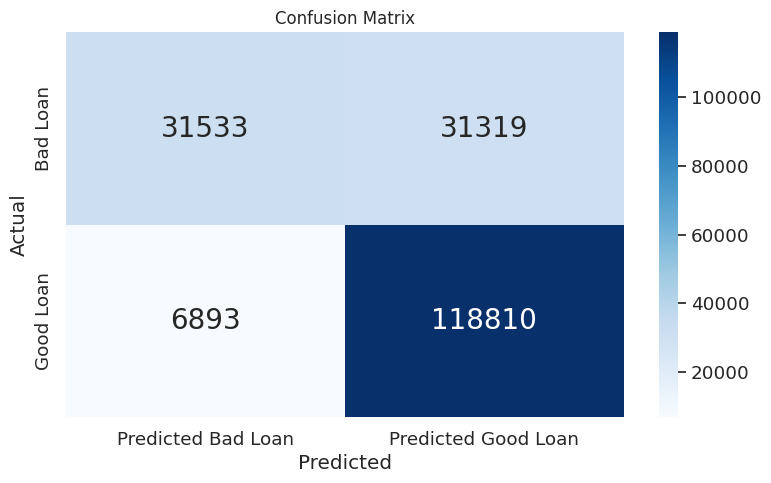

In [ ]:
show_cmatrix(y_test, y_pred_lg)

## Feature Importance

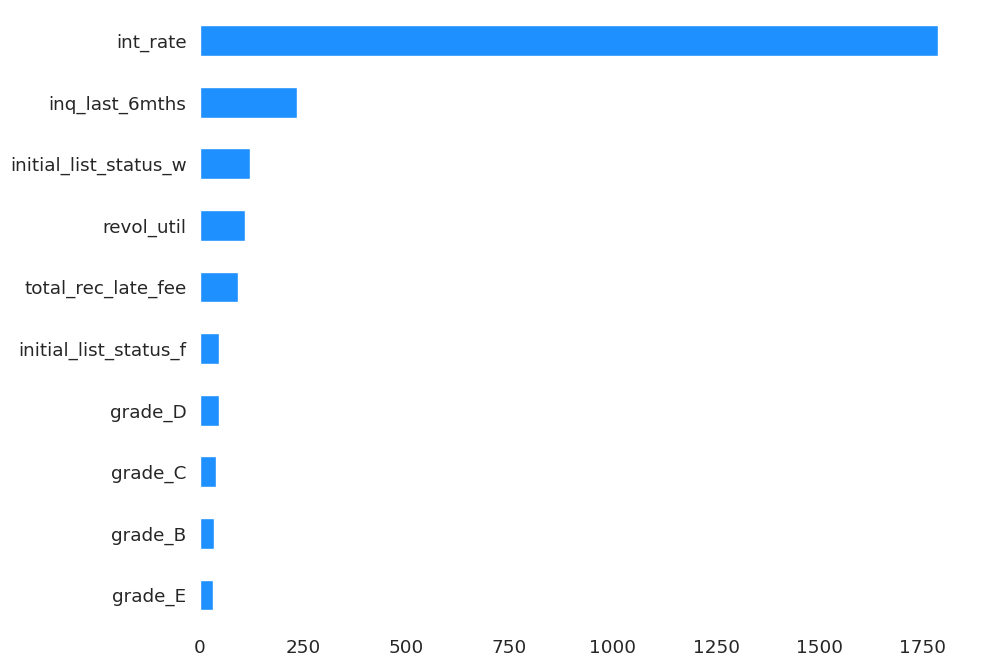

In [ ]:
# plt.figsize(10, 10)
feat_importances = pd.Series(lgbm_model.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8),color='dodgerblue')
ax.set(facecolor = "white")
ax.invert_yaxis()

## Modelling with Feature Importance (Validation)

In [ ]:
df_ml_fi = df7.copy()

In [ ]:
df_ml_fi.columns

Index(['term', 'int_rate', 'inq_last_6mths', 'revol_util',
       'total_rec_late_fee', 'status', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w'],
      dtype='object')

In [ ]:
X_fi = df_ml_fi[['int_rate', 'revol_util', 'inq_last_6mths', 'total_rec_late_fee', 'initial_list_status_f', 'term', 'home_ownership_RENT',
                 'purpose_small_business', 'home_ownership_MORTGAGE', 'purpose_debt_consolidation']]
y_fi = df_ml_fi[['status']]

In [ ]:
from sklearn.model_selection import train_test_split

X_fi_train,X_fi_test,y_fi_train,y_fi_test = train_test_split(X_fi,y_fi,test_size = 0.3,stratify=y_fi,random_state = 42)

In [ ]:
evaluation_summary_fi = modelling(X_fi_train,X_fi_test,y_fi_train,y_fi_test)
evaluation_summary_fi = pd.DataFrame(evaluation_summary_fi)
evaluation_summary_fi

> Modeling results with only top 10 features, the results are not much different, it can be said that the modeling is good enough